<a href="https://colab.research.google.com/github/legendarygirl56/Data-science/blob/master/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
def entropy(sequence):
    items,counts=np.unique(sequence,return_counts=True)
    probs= counts/np.sum(counts)
    return -np.sum(probs*np.log2(probs))

In [0]:
entropies=[]
for red in range(51):
    blue = 50 - red
    balls = ["Blue"] * blue + ["Red"] * red
    entropies.append(entropy(balls))

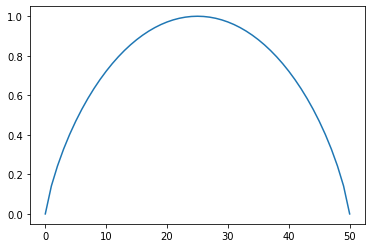

In [28]:
plt.plot(entropies)

In [0]:
df=pd.DataFrame()


In [0]:
df["Age"]=np.random.randint(30,60,100)

In [0]:
df["Sex"]=np.random.randint(0,2,100)
df["Kids"]=np.random.randint(0,4,100)

In [45]:
df

,Age,Sex,Kids
0,41,0,3
1,37,0,2
2,45,0,2
3,39,1,2
4,41,0,2
...,...,...,...
95,55,0,2
96,40,1,0
97,42,0,0
98,47,0,2


In [33]:
entropy(df.Sex)

0.9858150371789198

In [0]:
pivot=50

In [0]:
left=df.loc[df["Age"]<pivot]

In [0]:
right=df.loc[df["Age"]>=pivot]

In [37]:
entropy(right.Sex)

0.9774178175281716

In [0]:
probleft,probright=len(left)/len(df),len(right)/len(df)

In [41]:
entropy(df.Sex)-probleft*entropy(left.Sex)-probright*entropy(right.Sex)#information gain formula(entropy loss)

0.0005050943124694784

In [0]:
def infogain(X,y,label):#X has Age features and y has Sex value
    pivot=X[label].mean()#assumption

    left=y.loc[X[label]<pivot]
    right=y.loc[X[label]>=pivot]

    prob_l,prob_r=len(left)/len(y),len(right)/len(y)
    return entropy(y)-prob_l*entropy(left)-prob_r*entropy(right)#information gain formula(entropy loss)

In [0]:
X=df[['Age' , 'Kids']]

In [0]:
y=df.Sex

In [48]:
infogain(X,y,'Age')#with respect to age feature

0.00033889823986665846

In [49]:
infogain(X,y,'Kids')

0.008565085355025315